In [71]:
import pandas as pd
import matplotlib

## Metadata

In [72]:
train_metadata = pd.read_csv("/home/krzysztof/Documents/Studia/Master_thesis/02_Source_code/breast-cancer-research/data/labels_for_whole_cases/train_set.csv")
val_metadata = pd.read_csv("/home/krzysztof/Documents/Studia/Master_thesis/02_Source_code/breast-cancer-research/data/labels_for_whole_cases/validation_set.csv")
test_metadata = pd.read_csv("/home/krzysztof/Documents/Studia/Master_thesis/02_Source_code/breast-cancer-research/data/labels_for_whole_cases/test_set.csv")
all_metadata = pd.read_csv("/home/krzysztof/Documents/Studia/Master_thesis/02_Source_code/breast-cancer-research/data/labels_for_whole_cases/metadata_for_whole_images_v2.csv")

## Hitograms

### Check if metadata is equally splitted based on key parameters

In [98]:
def print_histogram_for_feature_distribution(checked_feature, train_metadata, val_metadata, test_metadata):
    unique_value = set()
    for metadata in [train_metadata, val_metadata, test_metadata]:
        unique_value.update(train_metadata[checked_feature].unique())
    unique_value = sorted(list(unique_value))
    histogram_data = pd.DataFrame(columns=["unique_val_{}".format(checked_feature), "train", "val", "test"])
    all_size = train_metadata[checked_feature].size + \
        val_metadata[checked_feature].size + \
        test_metadata[checked_feature].size

    for idx, u in enumerate(unique_value):
        histogram_data.loc[idx] = [
            u,
            train_metadata[train_metadata[checked_feature]==u][checked_feature].size/all_size,
            val_metadata[val_metadata[checked_feature]==u][checked_feature].size/all_size,
            test_metadata[test_metadata[checked_feature]==u][checked_feature].size/all_size
        ]
    histogram_data.plot(x = "unique_val_{}".format(checked_feature),kind="bar")
    

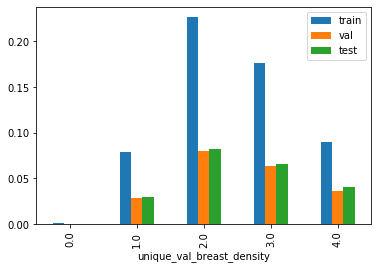

In [104]:
checked_feature = "breast_density"
print_histogram_for_feature_distribution(checked_feature, train_metadata, val_metadata, test_metadata)